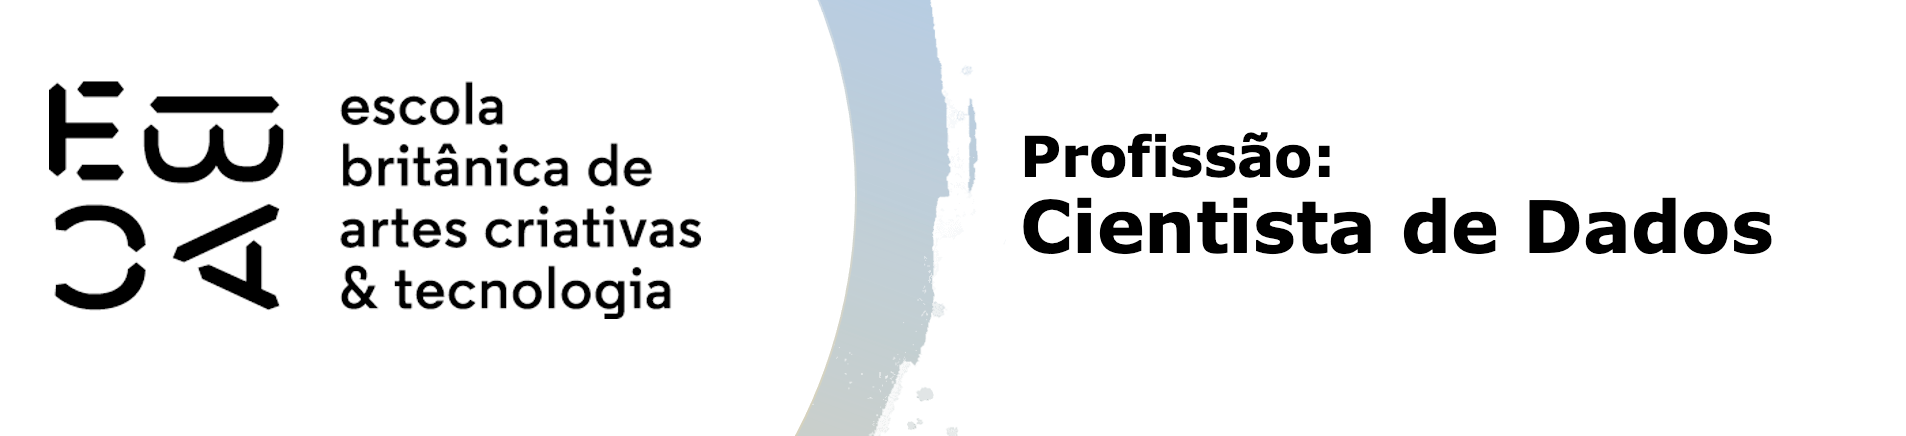

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy.interpolate import interp1d
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('previsao_de_renda.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace= True)

C:\Users\samsun\AppData\Local\Temp\ipykernel_22224\3139311991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace= True)


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
# Aqui separamos as bases entre treino e teste
df.reset_index(names='data', inplace=True)
meses = df['data'].unique()[-3:]

df_test = df[df['data'].isin(meses)].copy()
df_train = df[~df['data'].isin(meses)].copy()

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [6]:
res = smf.ols('np.log(renda) ~ sexo+  posse_de_veiculo+  posse_de_imovel+  idade + tempo_emprego', data = df_train).fit()
res.summary()
# Obs: Foram mantidas apenas as colunas com p-value menor que 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 8.925e+04
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:03   Log-Likelihood:            -8.0343e+05
No. Observations:              600000   AIC:                         1.607e+06
Df Residuals:                  599994   BIC:                         1.607e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.2669      0.005   1519.797      0.000       8.256       8.278
sexo[T.M]                 0.1308      0.003     47.068      0.000       0.125       0.136
posse_de_veiculo[T.S]     0.0252      0.003      9.546      0.000       0.020       0.030
posse_de_imovel[T.S]      0.1829      0.003     71.384      0.000       0.178       0.188
idade                    -0.0044      0.000    -38.456      0.000      -0.005      -0.004
tempo_emprego             0.1326      0.000    653.969      0.000       0.132       0.133
==============================================================================
Omnibus:                      887.641   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.591
Skew:                          -0.052   Prob(JB):                    1.43e-174
Kurtosis:                       2.854   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [7]:
# Categorizar a variável 'tempo_emprego' em 20 quantis, lidando com pontos de corte duplicados
df_train['categoria'] = pd.qcut(df_train['tempo_emprego'], q=20, labels=False, duplicates='drop')
df_train['log_renda'] = np.log(df_train['renda'])

# Criar a tabela de perfil
tabela_perfil = df_train.groupby('categoria').agg(
    quantidade_observacoes=('tempo_emprego', 'size'),
    media_log_renda=('log_renda', 'mean'),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()
tabela_perfil.head()

,categoria,quantidade_observacoes,media_log_renda,media_tempo_emprego
0,0,30234,8.364965,0.515042
1,1,30031,8.454323,1.125014
2,2,29736,8.569544,1.781261
3,3,30013,8.624148,2.510920
4,4,30408,8.755365,3.301180


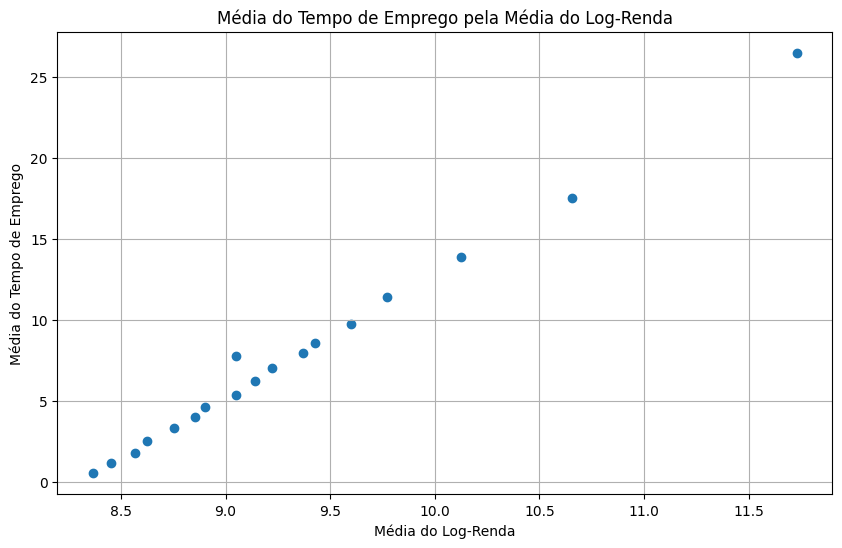

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(tabela_perfil['media_log_renda'], tabela_perfil['media_tempo_emprego'])
plt.xlabel('Média do Log-Renda')
plt.ylabel('Média do Tempo de Emprego')
plt.title('Média do Tempo de Emprego pela Média do Log-Renda')
plt.grid(True)
plt.show()

Ao se aplicar o logaritmo da renda, a relação entre a média deste log e a média do tempo de emprego mostrou-se bastante linear, logo, este modelo deve oferecer um $R^2-ajustado$ bastante alto.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


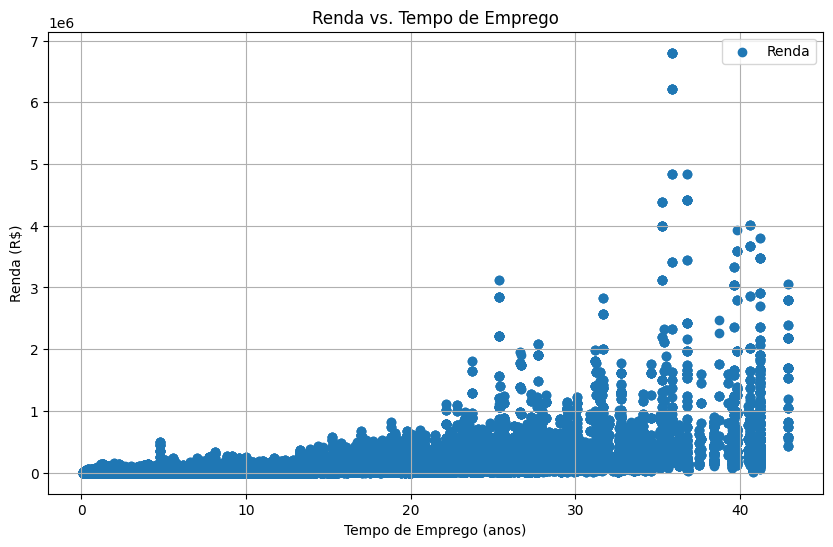

In [9]:
# Primeiramente iremos ver como a renda se distribui em função do tempo de emprego
tempo_emprego = df_train['tempo_emprego']
renda = df_train['renda']

plt.figure(figsize=(10, 6))
plt.scatter(tempo_emprego, renda, label='Renda')
plt.title('Renda vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda (R$)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Testamos primeiro a renda como função do tempo de emprego sem nenhuma transformação em x
res_2 = smf.ols('renda ~ tempo_emprego', data= df_train).fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 1.851e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:37   Log-Likelihood:            -7.6780e+06
No. Observations:              600000   AIC:                         1.536e+07
Df Residuals:                  599998   BIC:                         1.536e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.356e+04    182.314   -184.055      0.000   -3.39e+04   -3.32e+04
tempo_emprego  7957.6772     18.494    430.278      0.000    7921.429    7993.925
==============================================================================
Omnibus:                  1425439.625   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28550038647.676
Skew:                          24.009   Prob(JB):                         0.00
Kurtosis:                    1070.565   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Agora iremos testar todas as transformações vistas neste módulo, comoçamos pleo logsaritmo em x.
res_2 = smf.ols('renda ~ np.log(tempo_emprego)', data= df_train).fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                 4.935e+04
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:40   Log-Likelihood:            -7.7350e+06
No. Observations:              600000   AIC:                         1.547e+07
Df Residuals:                  599998   BIC:                         1.547e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.267e+04    259.961    -87.223      0.000   -2.32e+04   -2.22e+04
np.log(tempo_emprego)  2.968e+04    133.630    222.141      0.000    2.94e+04    2.99e+04
==============================================================================
Omnibus:                  1374920.358   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      19016285472.561
Skew:                          22.074   Prob(JB):                         0.00
Kurtosis:                     874.035   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Transformação polinomial em x.
res_pol = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2) + np.power(tempo_emprego, 3)', data= df_train).fit()
res_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                 1.289e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:42   Log-Likelihood:            -7.6095e+06
No. Observations:              600000   AIC:                         1.522e+07
Df Residuals:                  599996   BIC:                         1.522e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2962.7338    285.893     10.363      0.000    2402.393    3523.075
tempo_emprego               2883.4251     82.019     35.156      0.000    2722.671    3044.179
np.power(tempo_emprego, 2)  -284.1774      6.313    -45.017      0.000    -296.550    -271.805
np.power(tempo_emprego, 3)    17.4300      0.129    135.145      0.000      17.177      17.683
==============================================================================
Omnibus:                  1424357.620   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37796355244.323
Skew:                          23.806   Prob(JB):                         0.00
Kurtosis:                    1231.653   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Categorizando x
df_train['emprego_cat'], quebras = pd.qcut(df_train.tempo_emprego, 100, duplicates= 'drop', retbins= True)
res_cat = smf.ols('renda ~ emprego_cat', data= df_train).fit()
res_cat.rsquared

0.3506273703694457

In [14]:
res_exp = smf.ols('renda ~ np.exp(tempo_emprego)', data=df_train).fit()
res_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                nan
Time:                        14:40:50   Log-Likelihood:            -7.7550e+06
No. Observations:              600000   AIC:                         1.551e+07
Df Residuals:                  599999   BIC:                         1.551e+07
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.857e-31   1.21e-33    235.344      0.000    2.83e-31    2.88e-31
np.exp(tempo_emprego)  5.509e-13   2.34e-15    235.344      0.000    5.46e-13    5.55e-13
==============================================================================
Omnibus:                  1352861.944   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      19201259556.092
Skew:                          21.167   Prob(JB):                         0.00
Kurtosis:                     878.362   Cond. No.                     5.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Transformação em seno de x
res_sin = smf.ols('renda ~ np.sin(tempo_emprego)', data=df_train).fit()
res_sin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1769.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:54   Log-Likelihood:            -7.7578e+06
No. Observations:              600000   AIC:                         1.552e+07
Df Residuals:                  599998   BIC:                         1.552e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.998e+04    136.521    219.597      0.000    2.97e+04    3.02e+04
np.sin(tempo_emprego) -7446.5109    177.047    -42.059      0.000   -7793.518   -7099.504
==============================================================================
Omnibus:                  1347162.773   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15601060660.200
Skew:                          21.053   Prob(JB):                         0.00
Kurtosis:                     791.841   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Aqui faremos a transformação em y, essa transformação gerou uma relação bastante linear na tabela de testes, logo iremos testá-la
res_ = smf.ols('np.log(renda) ~ tempo_emprego', data=df_train).fit()
res_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 4.298e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:56   Log-Likelihood:            -8.0817e+05
No. Observations:              600000   AIC:                         1.616e+06
Df Residuals:                  599998   BIC:                         1.616e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2780      0.002   4262.716      0.000       8.274       8.282
tempo_emprego     0.1292      0.000    655.629      0.000       0.129       0.130
==============================================================================
Omnibus:                      798.953   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.227
Skew:                          -0.046   Prob(JB):                    1.80e-156
Kurtosis:                       2.857   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Aqui fazemos uma regressão segmentada
C1 = df_train['tempo_emprego'].mean()
df_train['X1_1'] = (df_train['tempo_emprego']<=C1)*df_train['tempo_emprego'] + (df_train['tempo_emprego']>C1)*C1
df_train['X1_2'] = (df_train['tempo_emprego']<=C1)*0 + (df_train['tempo_emprego']>C1)*(df_train['tempo_emprego']-C1)
res_seg = smf.ols('renda ~ X1_1 + X1_2', data=df_train).fit()
res_seg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                 1.267e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:40:59   Log-Likelihood:            -7.6530e+06
No. Observations:              600000   AIC:                         1.531e+07
Df Residuals:                  599997   BIC:                         1.531e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.343e+04    269.921     49.738      0.000    1.29e+04     1.4e+04
X1_1       -1690.5287     45.801    -36.910      0.000   -1780.298   -1600.760
X1_2        1.181e+04     24.461    482.646      0.000    1.18e+04    1.19e+04
==============================================================================
Omnibus:                  1444211.142   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      33750858726.167
Skew:                          24.754   Prob(JB):                         0.00
Kurtosis:                    1163.855   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Por fim usaremos o método de Lowess
lowess = sm.nonparametric.lowess(df_train.renda, df_train.tempo_emprego, frac= 2/3)
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]
f = interp1d(lowess_x, lowess_y, bounds_error=False)

In [19]:
df_train['X1_lowess'] = f(df_train.tempo_emprego)
res_lowess = smf.ols('renda ~ X1_lowess',data=df_train).fit()
res_lowess.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 3.090e+05
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:44:48   Log-Likelihood:            -7.6341e+06
No. Observations:              600000   AIC:                         1.527e+07
Df Residuals:                  599998   BIC:                         1.527e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.167e+04    126.884    -91.963      0.000   -1.19e+04   -1.14e+04
X1_lowess      2.1070      0.004    555.869      0.000       2.100       2.114
==============================================================================
Omnibus:                  1451557.887   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37270754487.419
Skew:                          25.032   Prob(JB):                         0.00
Kurtosis:                    1222.969   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos observar, os maiores valores de *R-quadrado* foram obtidos com a transformação polinomial em x e a transformação logaritmica em y. Esses serão os métodos a serem usados na base de testes.

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [20]:
# Aqui usaremos a transformação logaritmica em y.
test_log = smf.ols('np.log(renda) ~ tempo_emprego', data = df_test).fit()
renda_pred = test_log.predict(df_test['tempo_emprego'])
exp_renda_pred = np.exp(renda_pred)
r2_score(df_test['renda'], exp_renda_pred)

0.5027449603423106

In [21]:
# Aqui usaremos a transformação exponecial em x.
test_exp = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2) + np.power(tempo_emprego, 3)', data= df_test).fit()
renda_pred_2 = test_exp.predict(df_test['tempo_emprego'])
r2_score(df_test['renda'], renda_pred_2)

0.5243707207506829